## Problem Statement
Train a simple CNN on the Fashion MNIST dataset using Tensorflow Keras.

The Fashion MNIST dataset including:

*   60,000 training examples
*   10,000 testing examples
*   10 classes
*   28×28 grayscale images

The mapping of all 0-9 integers to class labels is listed below.
```
0: T-shirt/top
1: Trouser
2: Pullover
3: Dress
4: Coat
5: Sandal
6: Shirt
7: Sneaker
8: Bag
9: Ankle boot
```



*Install Keras Tuner library to get hyperparameters of CNN model like **No of Filters**, **Filter Size** and **Learning Rate of Adam Optimizer**.*

Requirement for keras Tuner is:

*   Python : 3.6
*   Tensorflow: 2.0




In [12]:
!pip install keras_tuner

     |████████████████████████████████| 97 kB 3.0 MB/s 


### Import required Libraries

In [4]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

### Load fashion mnist dataset from keras inbulid dataset

In [5]:
fashion_mnist = keras.datasets.fashion_mnist

### Train Test Split the Dataset

In [6]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [7]:
print(f"Train images shape", train_images.shape)
print(f"Test images shape", test_images.shape)

Train images shape (60000, 28, 28)
Test images shape (10000, 28, 28)


### Reshape the images

Images are grayscale so our channel would be 1. 

In [8]:
train_images = train_images.reshape(len(train_images), 28, 28, 1)
test_images= test_images.reshape(len(test_images), 28, 28, 1)

In [9]:
print(f"Train images shape", train_images.shape)
print(f"Test images shape", test_images.shape)

Train images shape (60000, 28, 28, 1)
Test images shape (10000, 28, 28, 1)


### Build a model function

In [24]:
def model_bulid(hp):
  #create the model layers
  model = keras.Sequential([
                            keras.layers.Conv2D(
                                filters = hp.Int('conv2d_1_filter', min_value = 32, max_value = 64, step = 16),
                                kernel_size = hp.Choice('conv2d_1_kernal', values=[3,5]),
                                activation = 'relu',
                                input_shape = (28, 28, 1)
                            ),
                            keras.layers.Conv2D(
                                filters = hp.Int('conv2d_2_filter', min_value = 32, max_value = 64, step = 16),
                                kernel_size = hp.Choice('conv2d_2_kernal',values =[3,5]),
                                activation = 'relu'
                            ),
                            keras.layers.Flatten(),
                            keras.layers.Dense(
                                units = hp.Int('dense_1_units', min_value = 32, max_value = 64, step = 16),
                                activation = 'relu'
                            ),
                            keras.layers.Dense(10, activation='softmax')
  ])

  #compile the model
  model.compile(optimizer = keras.optimizers.Adam(
      hp.Choice('Learning rate', values = [1e-2, 1e-3])),
      loss = 'sparse_categorical_crossentropy',
      metrics = ['accuracy']
  )

  return model

### Import models of Randomsearch and Hyperparameters from Kerastuner library

In [13]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  """Entry point for launching an IPython kernel.


In [25]:
tuner_search = RandomSearch(
    model_bulid,
    objective='val_accuracy', 
    max_trials=5, 
    directory = 'output', 
    project_name ='mnist_fashion'
)

### Run the search to get the accuracy for every epoch

In [26]:
tuner_search.search(train_images, train_labels, epochs = 3, validation_split = 0.1)

Trial 5 Complete [00h 00m 37s]
val_accuracy: 0.8824999928474426

Best val_accuracy So Far: 0.8859999775886536
Total elapsed time: 00h 03m 56s
INFO:tensorflow:Oracle triggered exit


### Get the best model having best accuracy from kerastuner

In [27]:
model = tuner_search.get_best_models(num_models=1)[0]

In [29]:
#get best model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 64)        1664      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 48)        27696     
_________________________________________________________________
flatten (Flatten)            (None, 23232)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                1486912   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 1,516,922
Trainable params: 1,516,922
Non-trainable params: 0
_________________________________________________________________


### Fit the data in Best Model

In [30]:
model.fit(train_images,train_labels,epochs=10,validation_split=0.1, initial_epoch=3)

Epoch 4/10
1688/1688 [==============================] - 13s 8ms/step - loss: 0.2696 - accuracy: 0.9016 - val_loss: 0.3337 - val_accuracy: 0.8848
Epoch 5/10
1688/1688 [==============================] - 13s 7ms/step - loss: 0.2347 - accuracy: 0.9129 - val_loss: 0.3586 - val_accuracy: 0.8830
Epoch 6/10
1688/1688 [==============================] - 13s 8ms/step - loss: 0.2028 - accuracy: 0.9246 - val_loss: 0.4053 - val_accuracy: 0.8805
Epoch 7/10
1688/1688 [==============================] - 13s 7ms/step - loss: 0.1731 - accuracy: 0.9358 - val_loss: 0.4168 - val_accuracy: 0.8787
Epoch 8/10
1688/1688 [==============================] - 13s 7ms/step - loss: 0.1550 - accuracy: 0.9429 - val_loss: 0.4048 - val_accuracy: 0.8892
Epoch 9/10
1688/1688 [==============================] - 12s 7ms/step - loss: 0.1350 - accuracy: 0.9512 - val_loss: 0.5086 - val_accuracy: 0.8643
Epoch 10/10
1688/1688 [==============================] - 13s 7ms/step - loss: 0.1229 - accuracy: 0.9559 - val_loss: 0.4629 - val_a

### Get the prediction on Test Images

In [31]:
prediction = model.predict(test_images)
prediction = np.argmax(prediction, axis = 1)
prediction

array([9, 2, 1, ..., 8, 1, 5])

In [32]:
score_test = model.evaluate(test_images,test_labels)
print(f" ",model.metrics_names[1]," : ", round(score_test[1]*100, 2))

313/313 [==============================] - 2s 5ms/step - loss: 0.5269 - accuracy: 0.8801
  accuracy  :  88.01


We can see the model accuracy on Train and Test data:

*   **Train Accuracy: ~96%**
*   **Test Accuracy: ~88%**



In [33]:
import matplotlib.pyplot as plt

In [73]:
 #map the classes with indexes for better visualization 
 class_mapping = {0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress',
                  4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker',8: 'Bag', 
                  9: 'Ankle boot'}

Try and look at the different test cases and check which all have gone wrong.

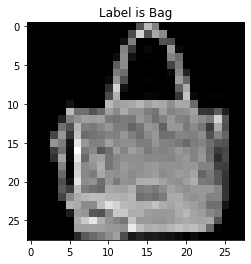

In [72]:
index = 2000
k = test_images[index, :]
k = k.reshape((28,28))
plt.title('Label is {label}'.format(label=class_mapping[prediction[index]]))
plt.imshow(k, cmap='gray')